## Práctica 1: Comparación entre estandarización de datos mediante computo secuencial y vectorización 
Daphne Sofía González Cano

En esta práctica se compara el tiempo de ejecucuón de la normalización de 100 000 datos aleatorios mediante un proceso secuencial y la vectorización de este. La fórmula de normalización ocupada es:

$$
z = \frac{x - \mu}{\sigma}
$$

#### Generación de los datos

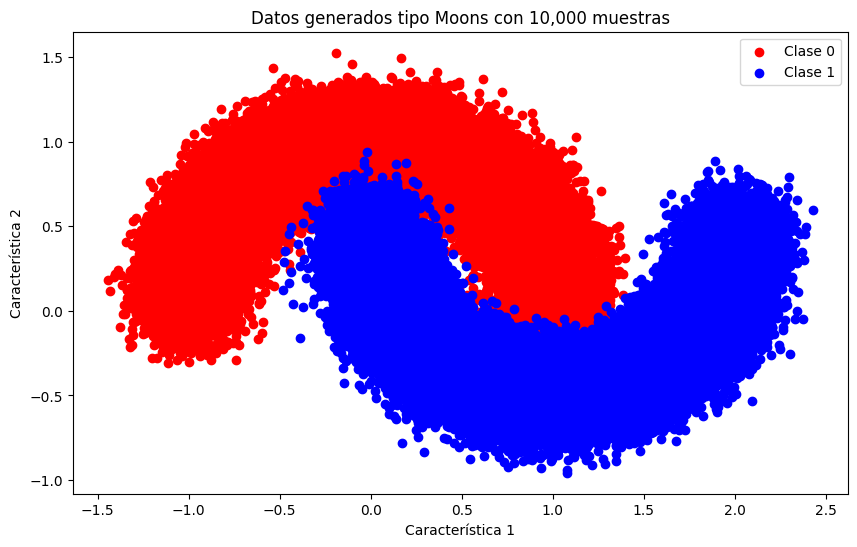

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generar los datos tipo 'moons' con 10,000 muestras y ruido añadido
X, y = make_moons(n_samples=100000, noise=0.13, random_state=42)

# Visualización de los datos generados
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
plt.title("Datos generados tipo Moons con 10,000 muestras")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.show()


#### Normalización de los datos de manera secuencial

In [2]:
from time import time

def normalizarVector(X):
    suma = 0
    # Medir el tiempo para calcular la media
    t = time()
    for x in X:
        suma += x
    media = suma / len(X)
    mediatiempo = time() - t

    # Inicializar la variable suma de las diferencias al cuadrado
    suma_cuadrados = 0

    # Medir el tiempo para calcular la desviación estándar
    t = time()
    for x in X:
        suma_cuadrados += (x - media) ** 2
    desviacion_estandar = (suma_cuadrados / len(X)) ** 0.5
    desviacion_tiempo = time() - t

    datos_normalizados = []
    t = time()
    # Usar un ciclo for para normalizar los datos
    for x in X:
        x_normalizado = (x - media) / desviacion_estandar
        datos_normalizados.append(x_normalizado)
    normalizacion_tiempo = time() - t

    tiempoTotal = mediatiempo + desviacion_tiempo + normalizacion_tiempo
    
    return datos_normalizados, mediatiempo, desviacion_tiempo, normalizacion_tiempo, tiempoTotal

_, mediatiempo, desviacion_tiempo, normalizacion_tiempo, timpoTotal= normalizarVector(X)

print(f"Tiempo para calcular la media: {mediatiempo:.6f} segundos")
print(f"Tiempo para calcular la desviación estándar: {desviacion_tiempo:.6f} segundos")
print(f"Tiempo para normalizar los datos: {normalizacion_tiempo:.6f} segundos")
print(f"Tiempo total: {timpoTotal:.6f} segundos")


Tiempo para calcular la media: 0.040469 segundos
Tiempo para calcular la desviación estándar: 0.123900 segundos
Tiempo para normalizar los datos: 0.092675 segundos
Tiempo total: 0.257045 segundos


Ejecución del código anterior 5 veces

In [3]:
sumMediatiempo = 0
sumDesviaciontiempo = 0
sumNormalizaciontiempo = 0
sumTotal = 0
timeTotal = 0

for _ in range(5):
    _, mediatiempo, desviacion_tiempo, normalizacion_tiempo, timpoTotal = normalizarVector(X)
    sumMediatiempo += mediatiempo
    sumDesviaciontiempo += desviacion_tiempo
    sumNormalizaciontiempo += normalizacion_tiempo
    sumTotal += timpoTotal

print(f"Tiempo promedio para calcular la media: {sumMediatiempo / 5:.6f} segundos")
print(f"Tiempo promedio para calcular la desviación estándar: {sumDesviaciontiempo / 5:.6f} segundos")
print(f"Tiempo promedio para normalizar los datos: {sumNormalizaciontiempo / 5:.6f} segundos")
print(f"Tiempo promedio total: {sumTotal / 5:.6f} segundos")


Tiempo promedio para calcular la media: 0.038524 segundos
Tiempo promedio para calcular la desviación estándar: 0.124032 segundos
Tiempo promedio para normalizar los datos: 0.093603 segundos
Tiempo promedio total: 0.256159 segundos


#### Normalización de los datos por vectorización


In [4]:
import numpy as np

def normalizarSeq(X):
    # Medir el tiempo para calcular la media usando numpy
    t = time()
    media = np.mean(X)
    mediatiempo = time() - t

    # Medir el tiempo para calcular la desviación estándar usando numpy
    t = time()
    desviacion_estandar = np.std(X)
    desviacion_tiempo = time() - t

    # Medir el tiempo para normalizar los datos usando numpy
    t = time()
    datos_normalizados = (X - media) / desviacion_estandar
    normalizacion_tiempo = time() - t
    
    tiempoT = mediatiempo + desviacion_tiempo + normalizacion_tiempo

    return datos_normalizados, mediatiempo, desviacion_tiempo, normalizacion_tiempo, tiempoT

_, mediatiempo, desviacion_tiempo, normalizacion_tiempo, timpoTotal = normalizarSeq(X)

print(f"Tiempo para calcular la media: {mediatiempo:.6f} segundos")
print(f"Tiempo para calcular la desviación estándar: {desviacion_tiempo:.6f} segundos")
print(f"Tiempo para normalizar los datos: {normalizacion_tiempo:.6f} segundos")
print(f"Tiempo total: {mediatiempo + desviacion_tiempo + normalizacion_tiempo:.6f} segundos")

Tiempo para calcular la media: 0.000000 segundos
Tiempo para calcular la desviación estándar: 0.001081 segundos
Tiempo para normalizar los datos: 0.000957 segundos
Tiempo total: 0.002038 segundos


Ejecución del código anterior 5 veces

In [5]:
sumMediatiempo = 0
sumDesviaciontiempo = 0
sumNormalizaciontiempo = 0
sumTotal = 0
timeTotal = 0

for _ in range(5):
    _, mediatiempo, desviacion_tiempo, normalizacion_tiempo, timpoTotal = normalizarSeq(X)
    sumMediatiempo += mediatiempo
    sumDesviaciontiempo += desviacion_tiempo
    sumNormalizaciontiempo += normalizacion_tiempo
    sumTotal += timpoTotal

print(f"Tiempo promedio para calcular la media: {sumMediatiempo / 5:.6f} segundos")
print(f"Tiempo promedio para calcular la desviación estándar: {sumDesviaciontiempo / 5:.6f} segundos")
print(f"Tiempo promedio para normalizar los datos: {sumNormalizaciontiempo / 5:.6f} segundos")
print(f"Tiempo promedio total: {sumTotal / 5:.6f} segundos")


Tiempo promedio para calcular la media: 0.000600 segundos
Tiempo promedio para calcular la desviación estándar: 0.000600 segundos
Tiempo promedio para normalizar los datos: 0.000799 segundos
Tiempo promedio total: 0.002000 segundos


#### Conclusión
Como podemos observar, el tiempo de ejecución de la normalización utilizando las funciones de la biblioteca NumPy es considerablemente más pequeño, reduciendo hasta dos lugares el punto decimal. Esto se debe a que los procesos de la biblioteca NumPy utilizan un método de vectorización, el cual optimiza las operaciones al aplicarlas a todo el conjunto de datos simultáneamente, en lugar de utilizar bucles tradicionales en Python.

Este proceso de vectorización es una técnica de optimización que aplica operaciones a conjuntos completos de datos simultáneamente, eliminando la necesidad de bucles explícitos en el código. Además de que aprovecha de una manera más eficientev el hardware moderno realizando operaciones en estructuras contiguas en memoria, lo cual se traduce en una mejora significativa de la velocidad y el rendimiento. Otro punto por el cual el proceso cvon la biblioteca es más rápido es que las bibliotecas como NumPy implementan estas operaciones en lenguajes de bajo nivel, lo que maximiza la eficiencia. Esto resulta en un código más simple, rápido y fácil de mantener, especialmente en grandes volúmenes de datos.